<a href="https://colab.research.google.com/github/s65021965/CodeAlpha_AB_testing_analysis/blob/main/Data_Science_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Conduct an A/B testing analysis to evaluate the impact
of a change or intervention. Analyze the results using
statistical techniques and draw actionable insights.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 72
np.random.seed(seed)

In [3]:
# Create some data
n = 9001
data = np.arange(n)
data

array([   0,    1,    2, ..., 8998, 8999, 9000])

In [4]:
df = pd.DataFrame(data, columns = ['data'])
df

,data
0,0
1,1
2,2
3,3
4,4
...,...
8996,8996
8997,8997
8998,8998
8999,8999


In [5]:
rand_var1 = np.random.normal(0, 5, data.size)
rand_var2 = np.random.normal(4, 2, data.size)
df['var1'] = pd.Series(rand_var1, index = df.index)
df['var2'] = pd.Series(rand_var2, index = df.index)
df.head()

,data,var1,var2
0,0,1.592727,0.500382
1,1,-3.397797,4.927748
2,2,-11.041942,3.330705
3,3,2.951201,5.835964
4,4,8.373830,4.580326


In [6]:
# Getting a random sample from the population
n = 200
df = df.sample(n, random_state = seed)
df.describe()

,data,var1,var2
count,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946
std,2368.773293,5.190724,2.051522
min,142.000000,-12.737091,-1.783443
25%,2374.000000,-3.186165,2.868998
50%,3852.500000,0.325406,4.228844
75%,6036.500000,3.278900,5.483611
max,8929.000000,13.291145,8.380286


In [7]:
# This is a uniform distribution
is_control = np.random.choice([0, 1], size = n)
df1 = df.assign(is_control = is_control)
df1.describe()

,data,var1,var2,is_control
count,200.000000,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946,0.485000
std,2368.773293,5.190724,2.051522,0.501029
min,142.000000,-12.737091,-1.783443,0.000000
25%,2374.000000,-3.186165,2.868998,0.000000
50%,3852.500000,0.325406,4.228844,0.000000
75%,6036.500000,3.278900,5.483611,1.000000
max,8929.000000,13.291145,8.380286,1.000000


<Axes: xlabel='var1', ylabel='Density'>

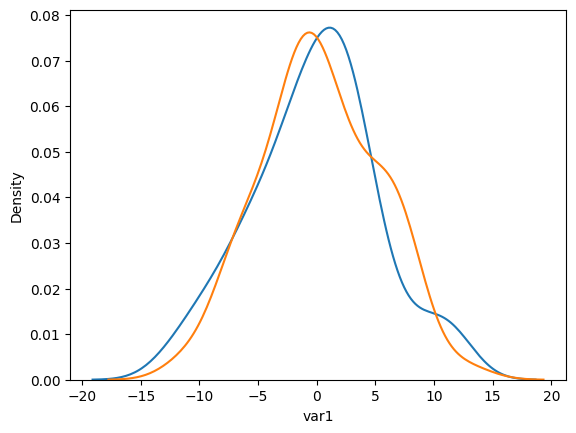

In [8]:
sns.kdeplot(df1[is_control == 0].var1)
sns.kdeplot(df1[is_control == 1].var1)

<Axes: xlabel='var2', ylabel='Density'>

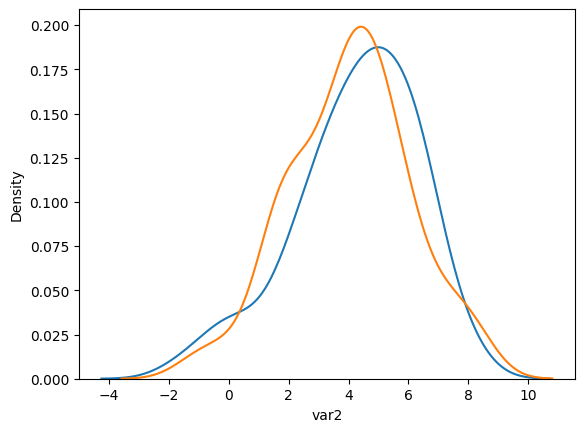

In [9]:
sns.kdeplot(df1[is_control == 0].var2)
sns.kdeplot(df1[is_control == 1].var2)

<Axes: xlabel='var1', ylabel='Density'>

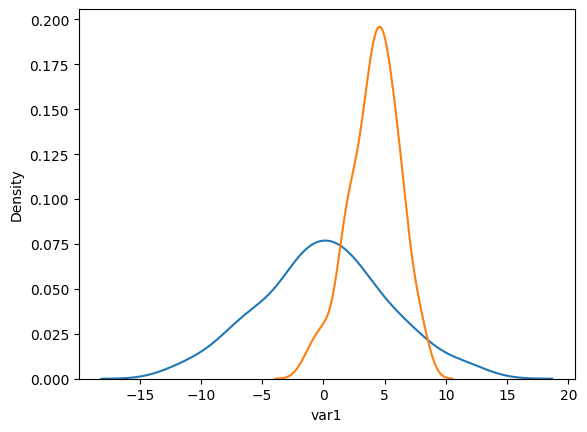

In [10]:
sns.kdeplot(df1.var1)
sns.kdeplot(df1.var2)

In [11]:
from scipy import stats
def is_significant(group1, group2, alpha = 0.05):
    t, p = stats.ttest_ind(group1, group2, equal_var = False)
    return p < alpha, p

In [12]:
def experiment_vs_control(df1, var_name, alpha = 0.05):
    experiment = df1[df1.is_control == 0][var_name]
    control = df1[df1.is_control == 1][var_name]
    return is_significant(experiment, control, alpha)

In [13]:
is_significant(df1.var1, df1.var2)

(True, 2.84912539013435e-21)

In [14]:
experiment_vs_control(df1, 'var1')

(False, 0.5583016605207449)

In [15]:
experiment_vs_control(df1, 'var2')

(False, 0.42978681439524635)